In [1]:
import zipfile
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed(25)

In [2]:
neu_faces = {}
with zipfile.ZipFile("eigenface_dataset.zip", "r") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith("a.jpg"):
            continue # not a face picture
        #with facezip.open(filename) as image:
        image = facezip.read(filename)
        neu_faces[filename] = cv2.imread(filename, 0)

In [3]:
smi_faces = {}
with zipfile.ZipFile("eigenface_dataset.zip", "r") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith("b.jpg"):
            continue # not a face picture
        #with facezip.open(filename) as image:
        image = facezip.read(filename)
        smi_faces[filename] = cv2.imread(filename, 0)
        

In [4]:
neu_faces = {k: v for k, v in neu_faces.items() if v is not None}
smi_faces = {k: v for k, v in smi_faces.items() if v is not None}

In [5]:
list(neu_faces.keys())[:5]

['upload_dataset/134a.jpg',
 'upload_dataset/7a.jpg',
 'upload_dataset/83a.jpg',
 'upload_dataset/163a.jpg',
 'upload_dataset/175a.jpg']

In [6]:
list(smi_faces.keys())[:5]

['upload_dataset/60b.jpg',
 'upload_dataset/138b.jpg',
 'upload_dataset/21b.jpg',
 'upload_dataset/179b.jpg',
 'upload_dataset/196b.jpg']

### Show first 16 faces

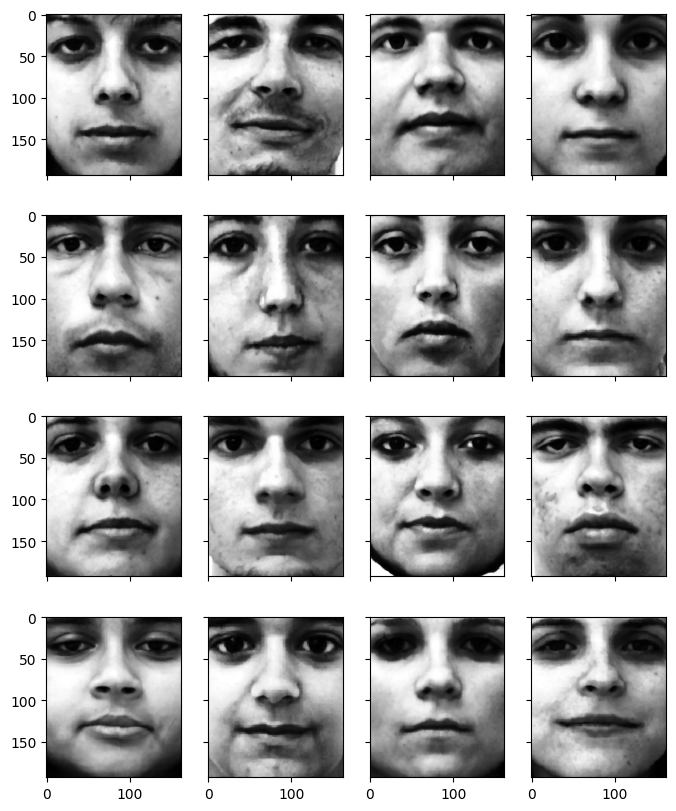

In [7]:
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
neu_faceimages = list(neu_faces.values())[-16:] # take last 16 images
for i in range(16):
    axes[i%4][i//4].imshow(neu_faceimages[i], cmap="gray")
plt.show()

In [8]:
# get face shape
faceshape = list(neu_faces.values())[0].shape
print(faceshape)

(193, 162)


# Question 1

In [9]:
#select 100 random keys of NEUTRAL FACES
rand_neukeys = random.sample(list(neu_faces),100)
rand_neu = {k: v for k, v in neu_faces.items() if k in rand_neukeys}

(31266, 100)


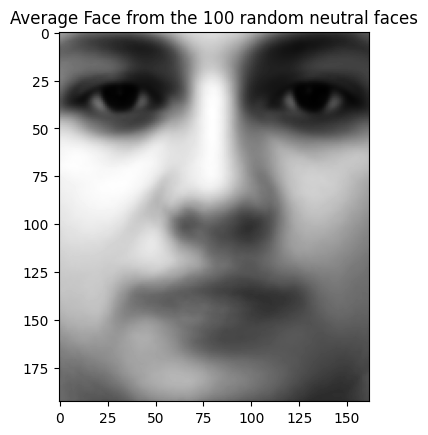

In [10]:
avg_list = np.array([np.array(rand_neu[key].flatten().tolist()) for key in rand_neu]).T
avg_list = np.vstack(avg_list)
print(avg_list.shape)
faceArr = []
for i in range(31266):
    faceArr.append(np.mean(avg_list[i]))

avg_face = np.array(faceArr)
avFace = avg_face.reshape(193,162)
plt.imshow(avFace, cmap="gray")
plt.title("Average Face from the 100 random neutral faces")
plt.show()

In [11]:
#flatten the neutral faces (store as columns) and subtract by the avg
flat_neu = np.array([np.array(rand_neu[key].flatten().tolist()) for key in rand_neu]).T
flat_neu = np.vstack(flat_neu)
print(flat_neu.shape)


#flat_neu = [np.subtract(i, avg_face) for i in flat_neu]
#neu_cov = np.matmul(flat_neu, np.array(flat_neu).transpose())

(31266, 100)


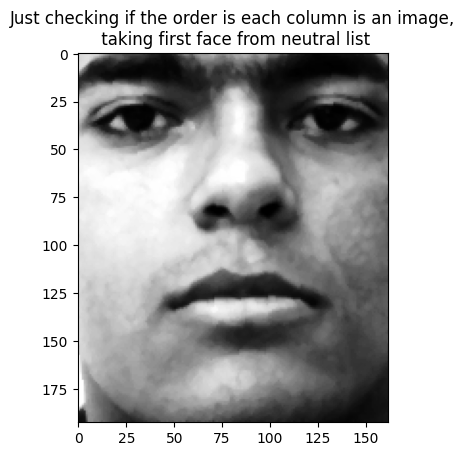

In [12]:
facecol = flat_neu[:,0].reshape(193,162)
plt.imshow(facecol, cmap="gray")
plt.title("Just checking if the order is each column is an image,\n taking first face from neutral list")
plt.show()

In [13]:
#normalize
Zface = flat_neu - np.tile(avg_face, (100,1)).T
print(Zface.shape)

(31266, 100)


In [14]:
#get covariance
covFace = np.matmul(Zface.T, Zface)
print(covFace.shape)

(100, 100)


In [15]:
#get eigenvalu and eigenvec
neu_eig, neu_eigv = np.linalg.eig(covFace)

In [16]:
#sort by largest eigenvalue then from the 
#idx sort the eigenvec based on eigenval
idxNeu = neu_eig.argsort()[::-1]

neuFace = neu_eigv[:,idxNeu]

In [17]:
neuFace.shape

(100, 100)

In [18]:
final_neu = np.matmul(Zface, neuFace)
print(final_neu.shape)

(31266, 100)


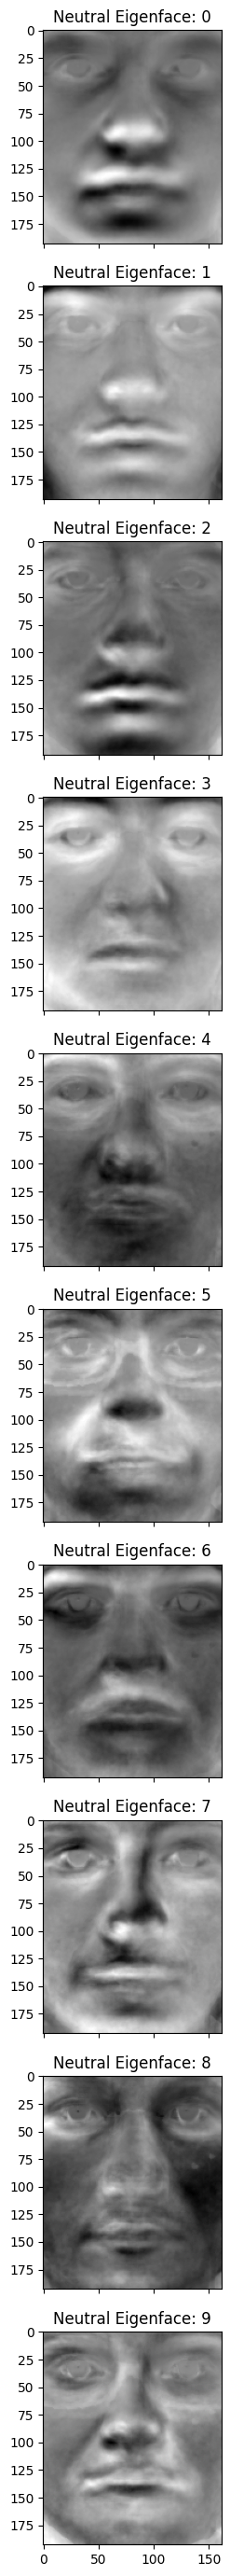

In [19]:
fig, axes = plt.subplots(10,1,sharex=True,sharey=True,figsize=(35,35))
for i in range(10):
    axes[i].imshow(final_neu[:,i].reshape(193,162), cmap="gray")
    axes[i].set_title("Neutral Eigenface: " + str(i))
plt.show()

In [20]:
#get the singular values of data matrix
v,s,vt = np.linalg.svd(covFace)
print(v.shape)
print(s.shape)
print(vt.shape)

(100, 100)
(100,)
(100, 100)


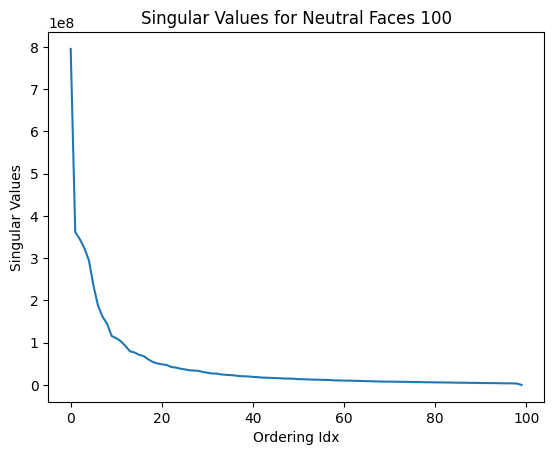

In [21]:
plt.plot(range(100), s[:100])
plt.title("Singular Values for Neutral Faces 100")
plt.ylabel("Singular Values")
plt.xlabel("Ordering Idx")
plt.show()

### I pick k = 20 since the elbow is around there since it is transition from signal to noise

## 1b Smiling!

In [22]:
rand_smikeys = [i.replace("a.jpg", "b.jpg") for i in rand_neukeys]
rand_smi = {k: v for k, v in smi_faces.items() if k in rand_smikeys}

(31266, 100)


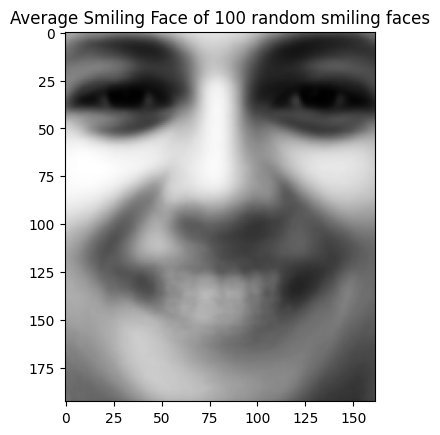

In [23]:
smi_avg_list = np.array([np.array(rand_smi[key].flatten().tolist()) for key in rand_smi]).T
smi_avg_list = np.vstack(smi_avg_list)
print(smi_avg_list.shape)
faceSmiArr = []
for i in range(31266):
    faceSmiArr.append(np.mean(smi_avg_list[i]))

avg_smiface = np.array(faceSmiArr)
avSmFace = avg_smiface.reshape(193,162)
plt.imshow(avSmFace, cmap="gray")
plt.title("Average Smiling Face of 100 random smiling faces")
plt.show()

In [24]:
#flatten the smile faces and subtract by the avg
flat_smi = np.array([np.array(rand_smi[key].flatten().tolist()) for key in rand_smi]).T
flat_smi = np.vstack(flat_smi)
print(flat_smi.shape)

(31266, 100)


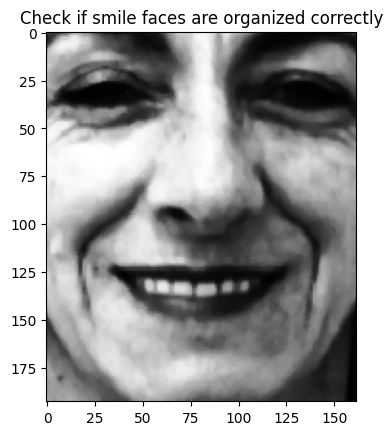

In [25]:
facecol = flat_smi[:,0].reshape(193,162)
plt.imshow(facecol, cmap="gray")
plt.title("Check if smile faces are organized correctly")
plt.show()

In [26]:
#normalize faces
Smface = flat_smi - np.tile(avg_smiface, (100,1)).T
print(Smface.shape)

(31266, 100)


In [27]:
#get covariance
covSmiFace = np.matmul(Smface.T, Smface)
print(covSmiFace.shape)

(100, 100)


In [28]:
#get eigenval and eigenvec
eigSmV, eigSmVec = np.linalg.eig(covSmiFace)

In [29]:
#sort eigenvalues by largest to smallest, then sore eigenvectors by the eigenvals
idxSmi = eigSmV.argsort()[::-1]

smiFace = eigSmVec[:,idxSmi]

In [30]:
final_smi = np.matmul(Smface, smiFace)
print(final_smi.shape)

(31266, 100)


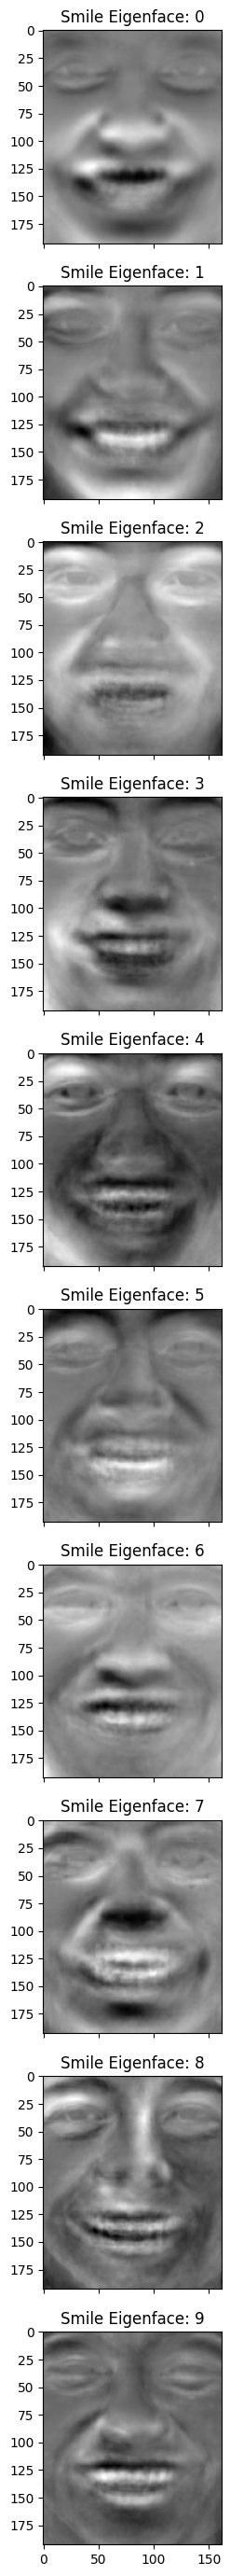

In [31]:
fig, axes = plt.subplots(10,1,sharex=True,sharey=True,figsize=(35,35))
for i in range(10):
    axes[i].imshow(final_smi[:,i].reshape(193,162), cmap="gray")
    axes[i].set_title("Smile Eigenface: " + str(i))
plt.show()

In [32]:
smi_data = np.array(covSmiFace).reshape(100,-1)
u1, s1, vh1 = np.linalg.svd(smi_data, full_matrices=False)

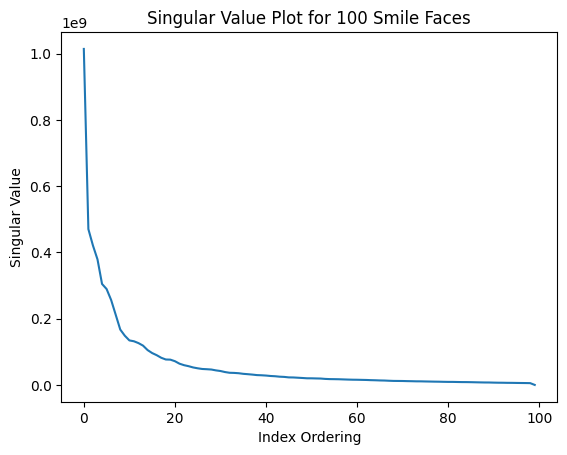

In [33]:
plt.plot(range(100), s1[:100])
plt.title("Singular Value Plot for 100 Smile Faces")
plt.ylabel("Singular Value")
plt.xlabel("Index Ordering")
plt.show()

### I pick k = 20 since the elbow is around there since it is transition from signal to noise

# Question 2

(31266,)


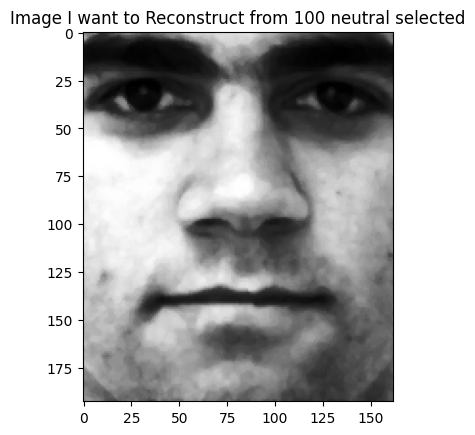

In [34]:
#image I want to reconstruct
recon_neuimg = np.array(flat_neu[:,5])
print(recon_neuimg.shape)
facecol = recon_neuimg.reshape(193,162)
plt.imshow(facecol, cmap="gray")
plt.title("Image I want to Reconstruct from 100 neutral selected")
plt.show()

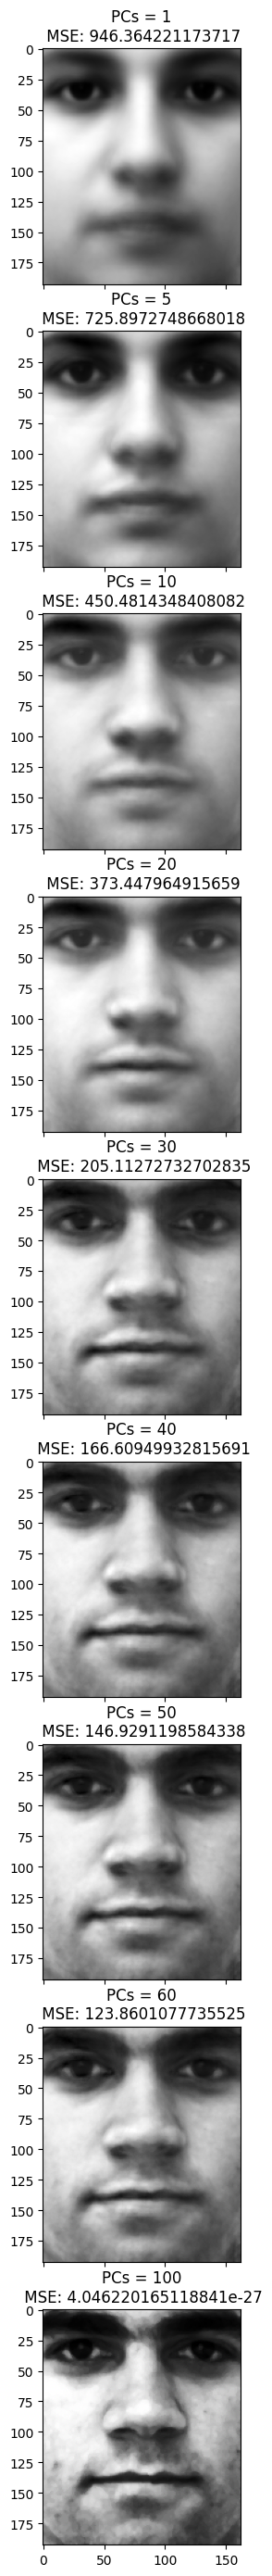

In [35]:
neu_PCA_list = [1,5,10,20,30,40,50,60,100]
fig, axes = plt.subplots(len(neu_PCA_list),1,sharex=True,sharey=True,figsize=(35,35))
neu_recon = []
neu_err = []
for k in neu_PCA_list:
    #get weights
    #need the image subtracted by avg since the eq is xi-avg = sum()
    weights = np.linalg.pinv(final_neu[:,:k]).dot(recon_neuimg-avg_face)#Zface[:,5])
    #add mean with weights mult
    recon_img = np.add(np.matmul(final_neu[:,:k], weights), avg_face)
    
    neu_err.append(np.square(np.subtract(recon_neuimg,recon_img.flatten())).mean())
    neu_recon.append(recon_img)
    
for i in range(len(neu_PCA_list)):
    axes[i].imshow(neu_recon[i].reshape(193,162), cmap="gray")
    axes[i].set_title("PCs = " + str(neu_PCA_list[i])  + "\n MSE: " + str(neu_err[i]))
plt.show()

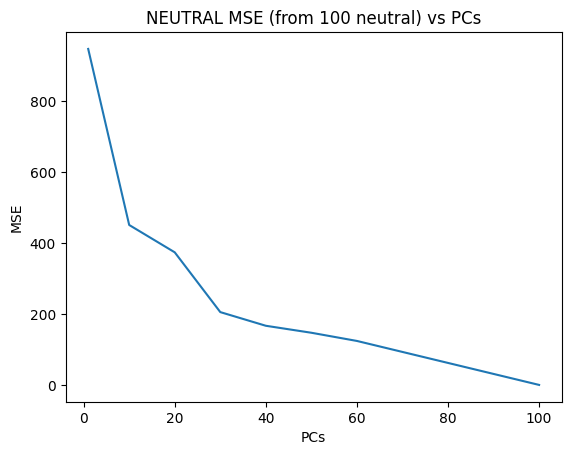

In [36]:
plt.plot(neu_PCA_list, neu_err)
plt.xlabel("PCs")
plt.ylabel("MSE")
plt.title("NEUTRAL MSE (from 100 neutral) vs PCs")
plt.show()

# Question 3
## SMILE IMAGE I WANT TO RECONSTRUCT

(31266,)


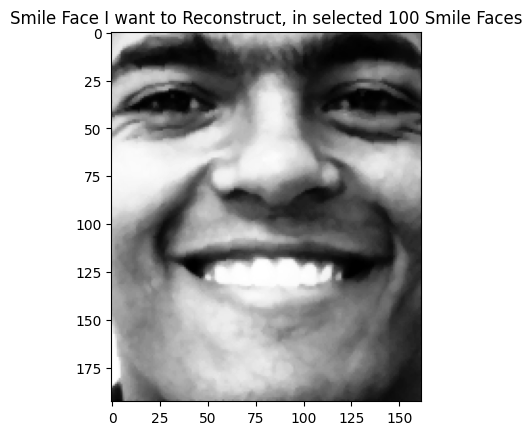

In [37]:
#smile image I want to reconstruct
recon_smiimg = np.array(flat_smi[:,5])
print(recon_smiimg.shape)
facecol = recon_smiimg.reshape(193,162)
plt.imshow(facecol, cmap="gray")
plt.title("Smile Face I want to Reconstruct, in selected 100 Smile Faces")
plt.show()

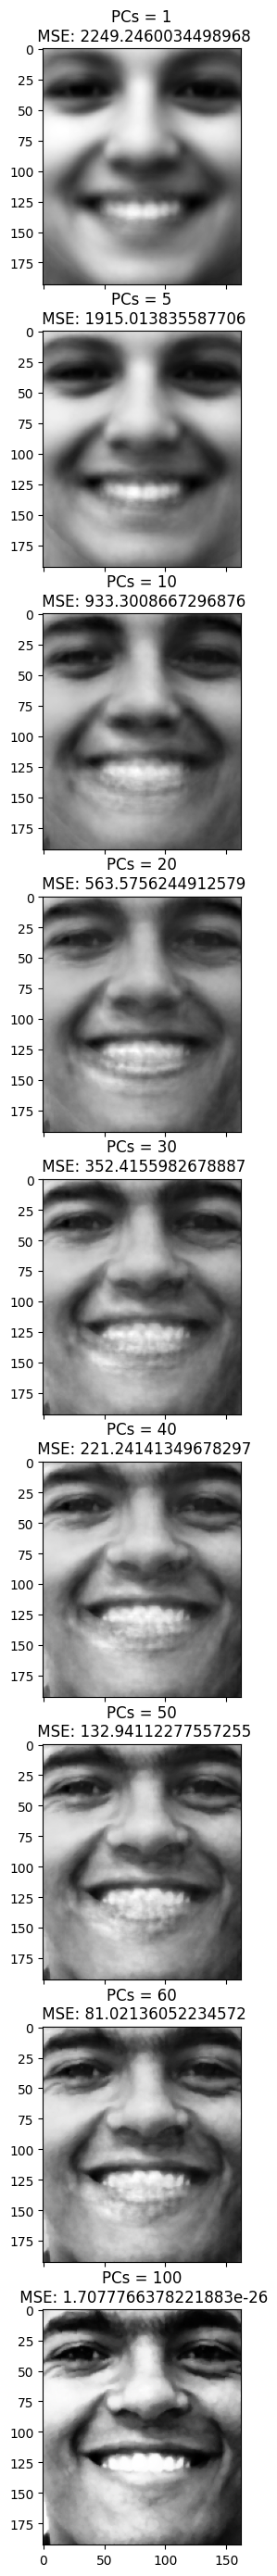

In [38]:
smi_PCA_list = [1,5,10,20,30,40,50,60,100]

fig, axes = plt.subplots(len(smi_PCA_list),1,sharex=True,sharey=True,figsize=(35,35))
smi_recon = []
smi_err = []
for k in smi_PCA_list:
    weights = np.linalg.pinv(final_smi[:,:k]).dot(recon_smiimg-avg_smiface)#Zface[:,5])
    #add mean with weights mult
    recon_img = np.add(np.matmul(final_smi[:,:k], weights), avg_smiface)
    smi_err.append(np.square(np.subtract(recon_smiimg, recon_img.flatten())).mean())
    smi_recon.append(recon_img)
    

for i in range(len(smi_PCA_list)):
    axes[i].imshow(smi_recon[i].reshape(193,162), cmap="gray")
    axes[i].set_title("PCs = " + str(smi_PCA_list[i])  + "\n MSE: " + str(smi_err[i]))
plt.show()

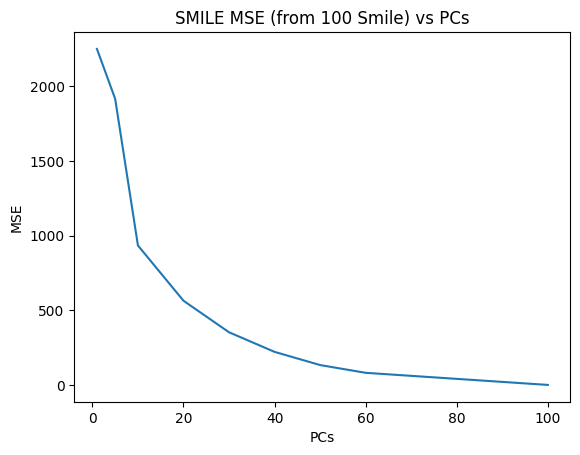

In [39]:
plt.plot(smi_PCA_list, smi_err)
plt.xlabel("PCs")
plt.ylabel("MSE")
plt.title("SMILE MSE (from 100 Smile) vs PCs")
plt.show()

# QUESTION 4
## Select Random Face Neutral that isnt in training

In [40]:
not_neu_face = []
for i in neu_faces:
    if i not in rand_neukeys:
        not_neu_face = neu_faces[i]
        break

(31266,)


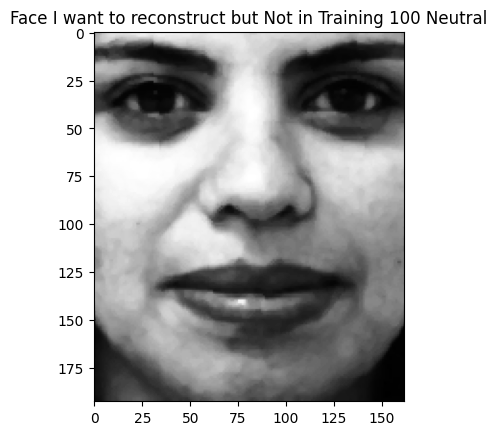

In [41]:
not_neu_face = np.array(not_neu_face).flatten()
print(not_neu_face.shape)
facecol = not_neu_face.reshape(193,162)
plt.imshow(facecol, cmap="gray")
plt.title("Face I want to reconstruct but Not in Training 100 Neutral")
plt.show()

In [42]:
print(not_neu_face.shape)

(31266,)


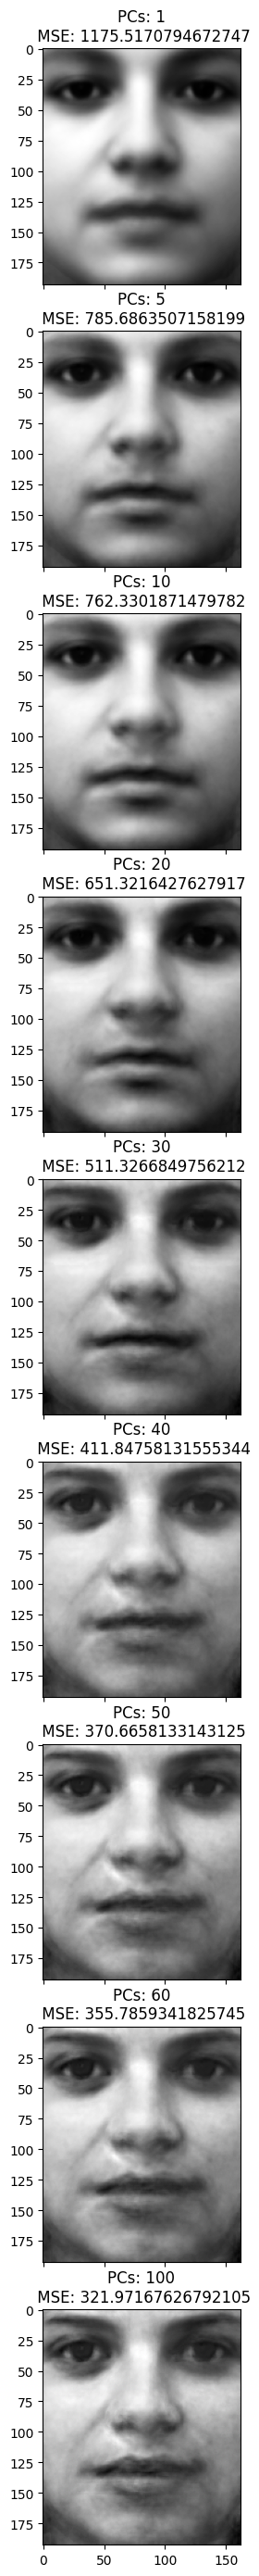

In [43]:
nonneu_PCA_list = [1,5,10,20,30,40,50,60,100]

fig, axes = plt.subplots(len(nonneu_PCA_list),1,sharex=True,sharey=True,figsize=(35,35))
nonn_recon = []
nonn_err = []
for k in nonneu_PCA_list:
    weights = np.linalg.pinv(final_neu[:,:k]).dot(not_neu_face-avg_face)#Zface[:,5])
    #add mean with weights mult
    recon_img = np.add(np.matmul(final_neu[:,:k], weights), avg_face)
    nonn_err.append(np.square(np.subtract(not_neu_face, recon_img.flatten())).mean())
    nonn_recon.append(recon_img)
    
for i in range(len(nonneu_PCA_list)):
    axes[i].imshow(nonn_recon[i].reshape(193,162), cmap="gray")
    axes[i].set_title("PCs: " + str(nonneu_PCA_list[i]) + "\n MSE: " + str(nonn_err[i]))
plt.show()

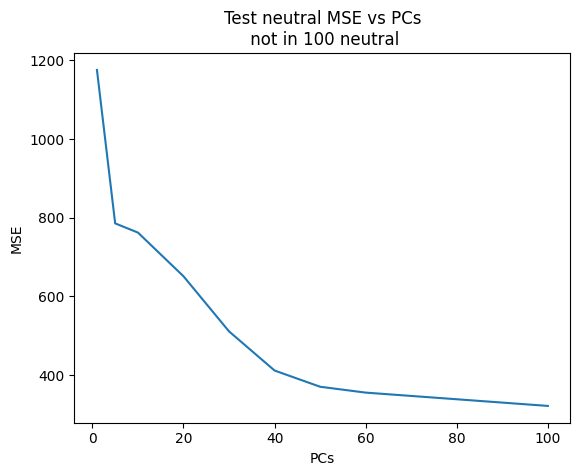

In [63]:
plt.plot(nonneu_PCA_list, nonn_err)
plt.xlabel("PCs")
plt.ylabel("MSE")
plt.title("Test neutral MSE vs PCs\n not in 100 neutral")
plt.show()

## 4b SMILE TEST BUT NOT IN SMILE TRAIN

In [45]:
not_smi_face = []
for i in smi_faces:
    if i not in rand_smikeys:
        not_smi_face = smi_faces[i]
        break

(31266,)


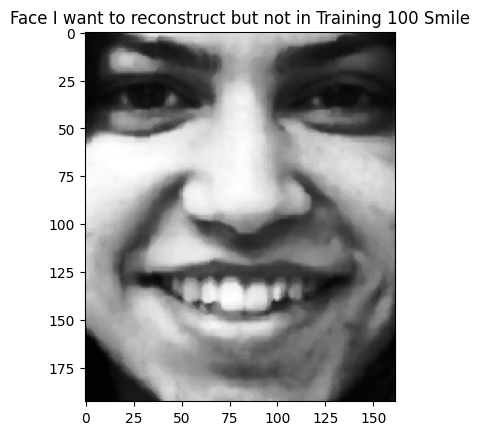

In [62]:
not_smi_face = np.array(not_smi_face).flatten()
print(not_smi_face.shape)
facecol = not_smi_face.reshape(193,162)
plt.imshow(facecol, cmap="gray")
plt.title("Face I want to reconstruct but not in Training 100 Smile")
plt.show()

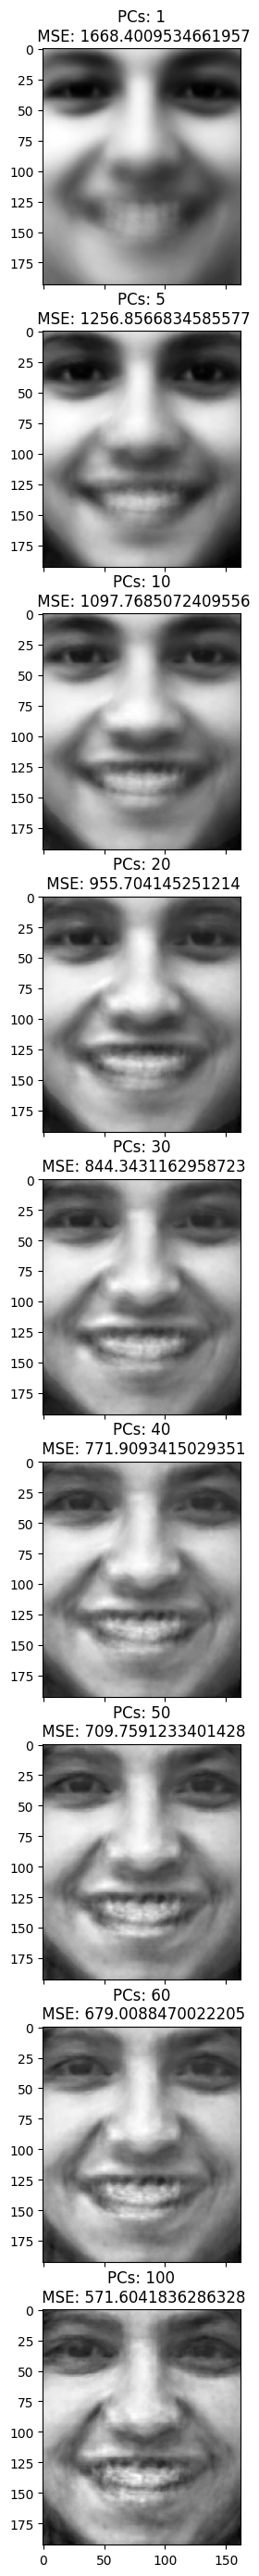

In [47]:
nonsmi_PCA_list = [1,5,10,20,30,40,50,60,100]

fig, axes = plt.subplots(len(nonsmi_PCA_list),1,sharex=True,sharey=True,figsize=(35,35))
nons_recon = []
nons_err = []
for k in nonsmi_PCA_list:
    weights = np.linalg.pinv(final_smi[:,:k]).dot(not_smi_face-avg_smiface)#Zface[:,5])
    #add mean with weights mult
    recon_img = np.add(np.matmul(final_smi[:,:k], weights), avg_smiface)
    nons_err.append(np.square(np.subtract(not_smi_face, recon_img.flatten())).mean())
    nons_recon.append(recon_img)
    
for i in range(len(nonsmi_PCA_list)):
    axes[i].imshow(nons_recon[i].reshape(193,162), cmap="gray")
    axes[i].set_title("PCs: " + str(nonsmi_PCA_list[i]) + "\n MSE: " + str(nons_err[i]))
plt.show()

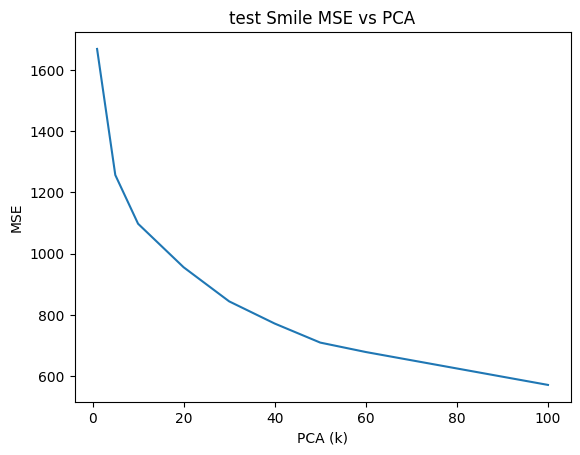

In [48]:
plt.plot(nonsmi_PCA_list, nons_err)
plt.xlabel("PCs")
plt.ylabel("MSE")
plt.title("test Smile MSE vs PCA\n not in 100 smile")
plt.show()

# Question 5

In [49]:
np.random.seed(25)

In [50]:
# Generate testing set
test_60 = []
for i in neu_faces:
    if i not in rand_neukeys:
        test_60.append([i,np.array(neu_faces[i]).flatten()])
        if len(test_60) == 30:
            break
for i in smi_faces:
    if i not in rand_smikeys:
        test_60.append([i,np.array(smi_faces[i]).flatten()])
        if len(test_60) == 60:
            break
test_60 = np.array(test_60)
np.random.shuffle(test_60)

C:\Users\cay10\AppData\Local\Temp\ipykernel_23212\1221041388.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_60 = np.array(test_60)


In [51]:
test_60.shape

(60, 2)

In [52]:
print(rand_neukeys)

['upload_dataset/44a.jpg', 'upload_dataset/163a.jpg', 'upload_dataset/145a.jpg', 'upload_dataset/71a.jpg', 'upload_dataset/137a.jpg', 'upload_dataset/193a.jpg', 'upload_dataset/40a.jpg', 'upload_dataset/10a.jpg', 'upload_dataset/56a.jpg', 'upload_dataset/79a.jpg', 'upload_dataset/74a.jpg', 'upload_dataset/69a.jpg', 'upload_dataset/77a.jpg', 'upload_dataset/183a.jpg', 'upload_dataset/139a.jpg', 'upload_dataset/35a.jpg', 'upload_dataset/128a.jpg', 'upload_dataset/120a.jpg', 'upload_dataset/26a.jpg', 'upload_dataset/89a.jpg', 'upload_dataset/116a.jpg', 'upload_dataset/192a.jpg', 'upload_dataset/22a.jpg', 'upload_dataset/32a.jpg', 'upload_dataset/39a.jpg', 'upload_dataset/178a.jpg', 'upload_dataset/98a.jpg', 'upload_dataset/62a.jpg', 'upload_dataset/130a.jpg', 'upload_dataset/72a.jpg', 'upload_dataset/186a.jpg', 'upload_dataset/162a.jpg', 'upload_dataset/12a.jpg', 'upload_dataset/99a.jpg', 'upload_dataset/136a.jpg', 'upload_dataset/167a.jpg', 'upload_dataset/76a.jpg', 'upload_dataset/9a.jp

In [53]:
test_60

array([['upload_dataset/82a.jpg',
        array([236, 231, 231, ...,  98,  98, 101], dtype=uint8)],
       ['upload_dataset/16a.jpg',
        array([198, 192, 176, ...,  68,  68,  63], dtype=uint8)],
       ['upload_dataset/119a.jpg',
        array([46, 46, 46, ...,  1,  0,  0], dtype=uint8)],
       ['upload_dataset/92a.jpg',
        array([231, 223, 219, ..., 155, 155, 159], dtype=uint8)],
       ['upload_dataset/179a.jpg',
        array([ 0,  0,  0, ..., 23, 23, 21], dtype=uint8)],
       ['upload_dataset/119b.jpg',
        array([71, 85, 85, ...,  1,  2,  2], dtype=uint8)],
       ['upload_dataset/109a.jpg',
        array([205, 198, 200, ..., 255, 254, 255], dtype=uint8)],
       ['upload_dataset/60b.jpg',
        array([11, 10, 10, ..., 15, 15, 16], dtype=uint8)],
       ['upload_dataset/41b.jpg',
        array([236, 232, 232, ...,  83,  91,  91], dtype=uint8)],
       ['upload_dataset/70b.jpg',
        array([242, 246, 245, ...,  98, 101, 101], dtype=uint8)],
       ['upload_data

In [54]:
def MSE(predict, labels):
    diff = [(x-y)**2 for x,y in zip(predict,labels)]
    return sum(diff) / len(diff)

In [55]:
k = 20
#Use only 1 k that you found in PCA

#fig, axes = plt.subplots(60,1,sharex=True,sharey=True,figsize=(35,35))
n_recon = []
n_mse = []
s_recon = []
s_mse = []
smile = []
neutral = []

for g in range(60):
    nweights = np.linalg.pinv(final_neu[:,:k]).dot(test_60[g][1]-avg_face)
    #add mean with weights mult
    nrecon = np.add(np.matmul(final_neu[:,:k], nweights), avg_face)
    #n_mse.append(np.square(np.subtract(test_60[g][1], nrecon.flatten())).mean())
    n_mse.append(MSE(test_60[g][1], nrecon.flatten()))
    n_recon.append(nrecon)

    sweights = np.linalg.pinv(final_smi[:,:k]).dot(test_60[g][1]-avg_smiface)
    #add mean with weights mult
    srecon = np.add(np.matmul(final_smi[:,:k], sweights), avg_smiface)
    #s_mse.append(np.square(np.subtract(test_60[g][1], srecon.flatten())).mean())
    s_mse.append(MSE(test_60[g][1], srecon.flatten()))
    s_recon.append(srecon)
    
    print("n %s, s %s",test_60[g][0], n_mse[g],s_mse[g])
    if n_mse[g] <= s_mse[g]:
        neutral.append(test_60[g])
    else:
        smile.append(test_60[g])
'''
for i in range(len(nonsmi_PCA_list)):
    axes[i][0].imshow(n_recon[i].reshape(193,162), cmap="gray")
    axes[i]
    axes[i].set_title("PCs: " + str(nonsmi_PCA_list[i]) + "\n MSE: " + str(nons_err[i]))
plt.show()
'''

n %s, s %s upload_dataset/82a.jpg 411.36380832178367 670.7483275891286
n %s, s %s upload_dataset/16a.jpg 657.6596884929087 1024.630164948923
n %s, s %s upload_dataset/119a.jpg 693.9551370027549 1321.5627048564409
n %s, s %s upload_dataset/92a.jpg 501.6151847719746 1037.446932332523
n %s, s %s upload_dataset/179a.jpg 716.6888319302063 1237.5680823583336
n %s, s %s upload_dataset/119b.jpg 1434.527752753394 1106.834244834126
n %s, s %s upload_dataset/109a.jpg 476.04008802949926 813.7772716116059
n %s, s %s upload_dataset/60b.jpg 1684.165839353618 955.7041452512145
n %s, s %s upload_dataset/41b.jpg 2314.2154470544915 1015.5066917699103
n %s, s %s upload_dataset/70b.jpg 2259.6322336560293 774.2538101497206
n %s, s %s upload_dataset/94b.jpg 845.3648069696443 784.8883621931732
n %s, s %s upload_dataset/134a.jpg 651.3216427627924 672.9536399467562
n %s, s %s upload_dataset/181b.jpg 1171.9383942558516 424.05085279786437
n %s, s %s upload_dataset/41a.jpg 787.6041686882747 1297.589302989976
n %s,

'\nfor i in range(len(nonsmi_PCA_list)):\n    axes[i][0].imshow(n_recon[i].reshape(193,162), cmap="gray")\n    axes[i]\n    axes[i].set_title("PCs: " + str(nonsmi_PCA_list[i]) + "\n MSE: " + str(nons_err[i]))\nplt.show()\n'

In [56]:
neu_accurate = len(list(filter(lambda x: x[0].endswith("a.jpg"), neutral)))
print(neu_accurate)
print(neu_accurate/len(neutral))

30
1.0


In [57]:
smi_accurate = len(list(filter(lambda x: x[0].endswith("b.jpg"), smile)))
print(smi_accurate)
print(smi_accurate/len(smile))

30
1.0


In [58]:
for i in neutral[:5]:
    print(i[0])

upload_dataset/82a.jpg
upload_dataset/16a.jpg
upload_dataset/119a.jpg
upload_dataset/92a.jpg
upload_dataset/179a.jpg


In [59]:
for i in smile[:5]:
    print(i[0])

upload_dataset/119b.jpg
upload_dataset/60b.jpg
upload_dataset/41b.jpg
upload_dataset/70b.jpg
upload_dataset/94b.jpg


### Print Incorrect Neutral Face and Display in Report

148.09165429256203
[148.09165429 141.17466625 139.15311485 ... 128.16493234 139.15762034
 145.94120752]


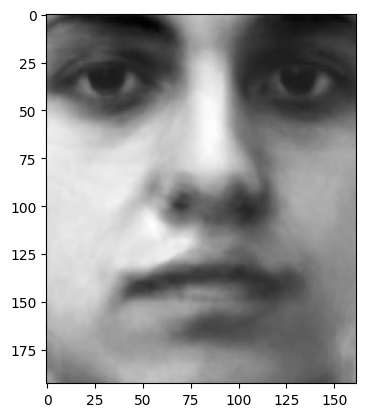

In [60]:
print(n_recon[3][0]) #check if it is wrong (b.jpg)
fake_neutral = np.array(n_recon[3])
print(fake_neutral)
fakeNeu = fake_neutral.reshape(193,162)
plt.imshow(fakeNeu, cmap="gray")
plt.show()

### Print incorrect Smile Face and Display

upload_dataset/41b.jpg
[236 232 232 ...  83  91  91]


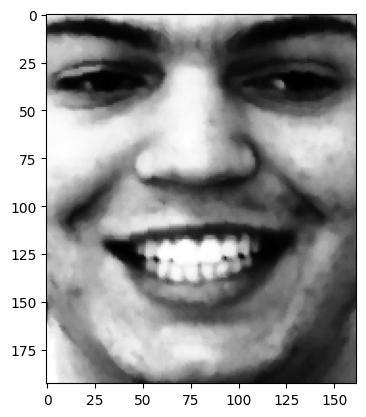

In [61]:
print(smile[2][0]) #check if it is wrong (a.jpg)
fake_smile = np.array(smile[2][1])
print(fake_smile)
fakeSmi = fake_smile.reshape(193,162)
plt.imshow(fakeSmi, cmap="gray")
plt.show()